<a href="https://colab.research.google.com/github/jsdhami/Lightning-Analysis/blob/main/Lightning_Data_Analysis_L2(EFM100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/jsdhami/Lightning-Analysis/refs/heads/main/EFM100/Data%20Source%201-06192024.csv')
df.columns = ['Time', 'Intensity', 'O']
df.head()

,Time,Intensity,O
0,06:45:01,0.82,0
1,06:45:01,0.84,0
2,06:45:01,0.82,0
3,06:45:01,0.83,0
4,06:45:01,0.83,0


In [66]:
# Convert to datetime (keep full datetime, not just time)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Subtract the minimum time and convert to seconds
df['Time_seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()


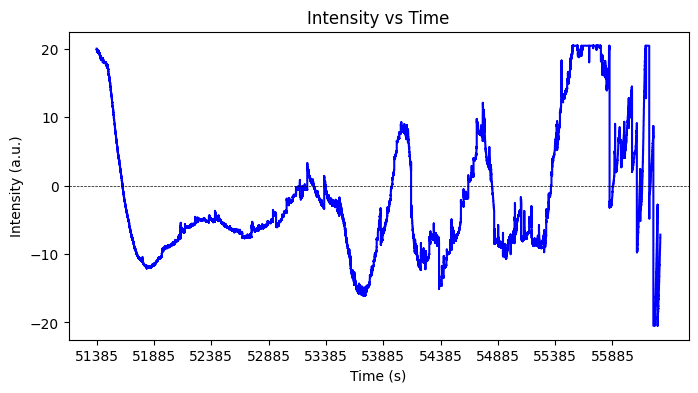

In [68]:
# Now use the numerical 'Time_seconds' column for plotting and setting xticks
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df['Time_seconds'].tail(100000), df['Intensity'].tail(100000), label='Intensity', color='blue')
ax.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Intensity vs Time')

# Use the numerical 'Time_seconds' for setting the xticks
ax.set_xticks(range(int(df['Time_seconds'].tail(100000).min()), int(df['Time_seconds'].tail(100000).max()), 500))

plt.show()

In [70]:
# using plotyjs
import plotly.express as px

In [72]:
fig = px.line(df.tail(100000), x='Time', y='Intensity', title='Intensity vs Time')
fig = fig.update_xaxes(showgrid=False)
fig = fig.update_yaxes(showgrid=False)
fig.show()

In [73]:
from scipy.signal import find_peaks

[  152   197   318   321   391   999  1097  1265  1379  1382  1384  1392
  1775  1778  1878  2163 37361 52797 53242 53437 53463 53466 53703 53945
 53955 54037 54203 54293 54575 54937 55011 55226 66856 67312 67315 67419
 67823 67986 68075 68175 68382 68496 68692 68764 69049 69293 69654 69937
 80816 81059 81637 81642 81672 81981 82403 82729 82740 82744 82758 82760
 82785 82816 82818 82826 82873 82958 82967 82997 83067 83070 83121 83238
 83395 83397 83427 83430 83432 83626 83628 83709 83746 83775 84128 84203
 84205 84266 84329 84411 84451 84509 84521 84542 84862 85198 85282 85284
 85298 85316 85355 85368 85430 85469 85563 85595 85612 85663 85746 85872
 85935 86008 86010 86049 86152 86788 87377 87719 88070 88087 88092 88094
 88369 88650 88652 88675 88691 88712 88715 88718 88731 88739 88755 88775
 88781 88812 88826 88838 88912 89009 89162 89301 89312 89317 89321 89323
 89333 89342 89344 89353 89355 89363 89380 89457 89480 89509 89582 89668
 89776 89811 89963 90028 90107 90215 90380 90401 90

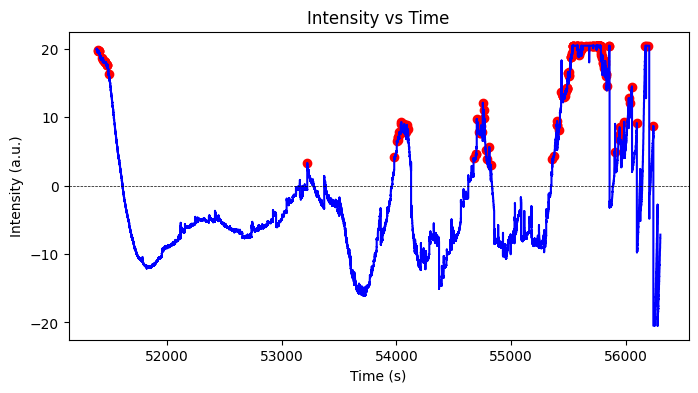

In [87]:
# find peaks
# Find peaks within the *last 100000* data points
intensity_subset = df['Intensity'].tail(100000)
peaks, _ = find_peaks(intensity_subset, height=3, width=15)
print(peaks)
# plot on map
fig, ax = plt.subplots(figsize=(8, 4))
# Plot the subset of data
ax.plot(df['Time_seconds'].tail(100000), intensity_subset, label='Intensity', color='blue')
# Use the peak indices found within the subset to index the subset's Time_seconds and Intensity
ax.scatter(df['Time_seconds'].tail(100000).iloc[peaks], intensity_subset.iloc[peaks], color='red', label='Peaks')
ax.axhline(y=0, color='black', linewidth=0.5, linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Intensity vs Time')

plt.show()

In [100]:
# find totalpositive charge and total negative charge
total_positive_charge = (df['Intensity'].tail(100000)>0).sum()
total_negative_charge = (df['Intensity'].tail(100000)<0).sum()

In [101]:
total_negative_charge, total_positive_charge

(np.int64(70019), np.int64(29965))

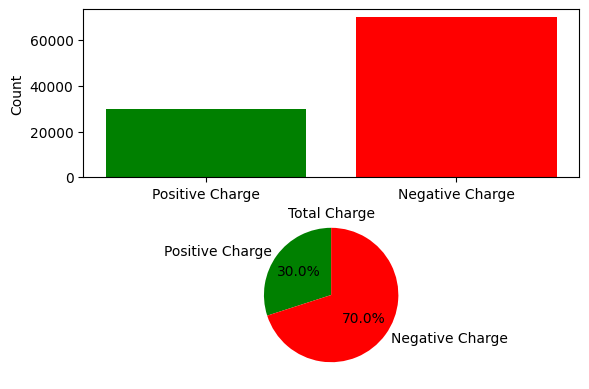

In [115]:
# plot bar diagram
fig, ax = plt.subplots(2)
ax[0].bar(['Positive Charge', 'Negative Charge'], [total_positive_charge, total_negative_charge], color=['green', 'red'])

ax[1].pie(
    [total_positive_charge, total_negative_charge],
    labels=['Positive Charge', 'Negative Charge'],
    colors=['green', 'red'],
    autopct='%1.1f%%',
    startangle=90
)
ax[0].set_xlabel('Total Charge')
ax[0].set_ylabel('Count')
plt.show()